# 3주차 과제 : Covid-19 데이터 다루기

### 1. 주어진 데이터로 그래프를 완성해 주세요. 첫번째 그래프는 전체 확진자 추이이고, 두 번째 그래프는 대륙별 코로나 확진자 추이이며, 세 번째 그래프는 가장 최근 일자 기준 HDI(인간개발지수)와 확진자 비율 간의 상관관계를 알아보고자 하는 육각형 그래프입니다.
첫 번째 그래프 x축을 Date로 바꾸는 거 성공하신 분은 진짜 특급 칭찬해드릴게여,, 전 실패함

### 2. 자율 문제) covid.info()로 코로나 데이터에 어떤 정보들이 담겨있는지 확인하고, 코로나 데이터로 원하는 그래프를 그려보세요. 창의적일수록 좋습니다. 
이 문제는 저도 과제에 참여할 예정입니다.

데이터 다운로드:
https://ourworldindata.org/coronavirus-source-data

In [134]:
import pandas as pd

# 데이터 가져오기
df = pd.read_csv('C:/Users/JY/Downloads/covid_data.csv')

In [135]:
# 전체 확진자 추이
# x축 date, y축 total_cases

# x축 date 날짜 형식으로 바꾸기
print(df['date'].dtype)
date_datetime = pd.to_datetime(df['date'], format = '%Y-%m-%d')
df['date_datetime'] = date_datetime
print(df['date_datetime'].dtype)

object
datetime64[ns]


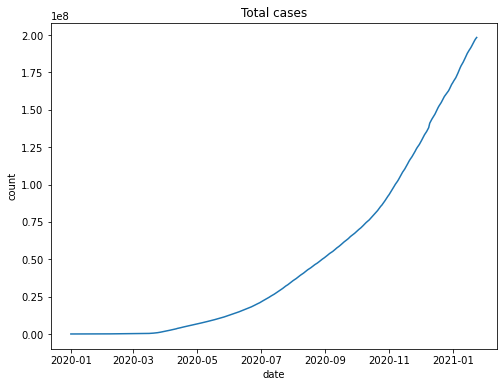

In [136]:
#선형 그래프 그리기
import matplotlib.pyplot as plt

df1 = df.groupby('date_datetime')['total_cases'].sum()

fig = plt.figure(figsize = (8,6))
plt.plot(df1)

plt.title('Total cases')
plt.xlabel('date')
plt.ylabel('count')
plt.show()

In [137]:
#대륙별 코로나 확진자 추이
df2 = df.pivot_table(values ="total_cases",index='date_datetime', columns='continent', aggfunc=sum)

# groupby로 해봤는데 실패

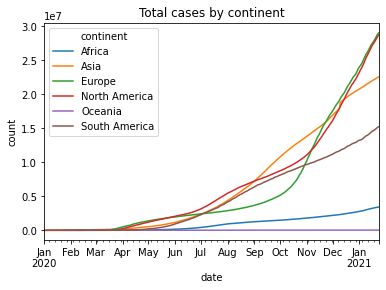

In [138]:
df2.plot()

plt.title('Total cases by continent')
plt.xlabel('date')
plt.ylabel('count')

plt.show()

In [139]:
# 가장 최근 일자 기준 HDI와 확진자 비율 간 상관관계 육각형

#x축 HDI, Y축 total_cases_per_million
date = df['date']
df3 = df[date == '2021-01-24']

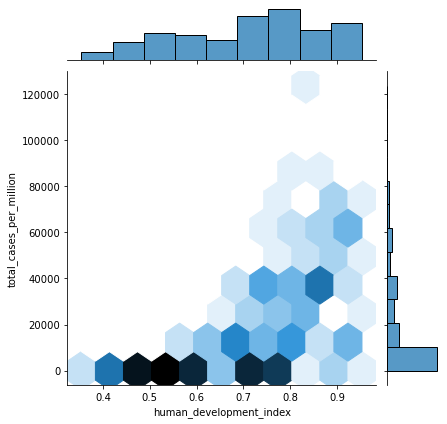

In [140]:
hexbin = sns.jointplot(x='human_development_index', y='total_cases_per_million', data=df3, kind = 'hex')
hexbin.set_axis_labels(xlabel='human_development_index', ylabel='total_cases_per_million')

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62047 entries, 0 to 62046
Data columns (total 56 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   iso_code                               61694 non-null  object        
 1   continent                              61325 non-null  object        
 2   location                               62047 non-null  object        
 3   date                                   62047 non-null  object        
 4   total_cases                            61450 non-null  float64       
 5   new_cases                              61443 non-null  float64       
 6   new_cases_smoothed                     60484 non-null  float64       
 7   total_deaths                           52913 non-null  float64       
 8   new_deaths                             52912 non-null  float64       
 9   new_deaths_smoothed                    60484 non-null  float6

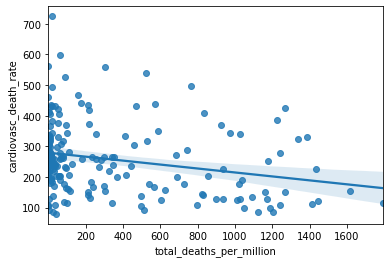

In [167]:
#최근일 기준 x축 total_deaths_per_million, y축 cardiovasc_death_rate

sns.regplot(x='total_deaths_per_million', y='cardiovasc_death_rate', data=df3)
plt.show()